**this is a template notebook for Assignment 3 on Classification. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# Clustering
Author: Ruben Schild<br>
Student number: 650580<br>
Date: 25-5-2022</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [1]:
# pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')    

# sns

try: 
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    print('seaborn was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')

except:
    !pip install statsmodels
    print('statsmodels was not installed, installed and imported')

# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

try:
    import eli5
    print('eli5 already installed, only imported')
except:
    !pip install eli5
    import eli5
    print('eli5 was not installed, installed and imported')

from eli5.sklearn import PermutationImportance

try:
    import sklearn.svm
    print('svm installed')
except:
    print('not installed')

try:
    import xgboost
    print('xgboost installed')
except:
    !pip install xgboost
    print('not installed')

try:
    import hdbscan
    print('hdbscan installed')
except:
    !pip install hdbscan
    print('hdbscan not installed')



Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
seaborn already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported
eli5 already installed, only imported
svm installed
xgboost installed
hdbscan installed


# 1. The Soccer Classification

In the Jupyter Notebook from lecture 6 there was one exercise using the k-means clustering, using the Soccer data. In this chapter we'll repeat that and also see how the other models perform with this data.

First we'll need to load the data itself.

In [2]:
# enter code to load the Soccer2019C.csv file
soccer_df = pd.read_csv('../data/Soccer2019C.csv')
soccer_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
2,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
4,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


We were interested to find any classes in 'Finishing' and 'HeadingAccuracy'. So lets select those from the data.

In [3]:
# enter code to select the two variables, make sure to also remove the missing values.
cust_x = soccer_df[['Finishing', 'HeadingAccuracy']].dropna()

A visual might be nice, so lets show the scatterplot of these two:

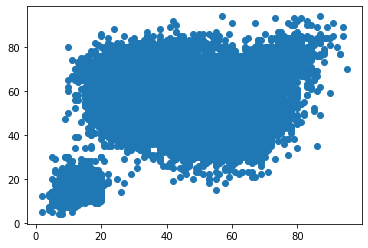

In [4]:
# code to create the scatterplot
plt.scatter(cust_x['Finishing'], cust_x['HeadingAccuracy'])

**<span >\<describe what you see, how many clusters would we expect?></span>** <br>
If we look at the scatterplot, it looks like there are 2 clusters... 

Now that we have the data, lets begin with the classification.

# 1.1. K-Means

The first, and probably most famous, technique discussed was the k-means. 

**<span >\<explain how k-means technique works in your own words></span>**. <br>

k-means technique is a centroid method. K-means uses centers to randomly choose points in the data, and assign every datapoint to the nearest center. When every point has been assigned, the center is moved to the average of all the assigned points.

We think there are two clusters, so lets first use that and set the k-means model using k=2. We'll use Elkan's algorithm, rather than full just to speed things along.

In [5]:
# code to create and fit the k-means model (with elkan and full) 
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(cust_x)

KMeans(algorithm='elkan', init='random', n_clusters=2, random_state=0)

Great, now lets see the result...

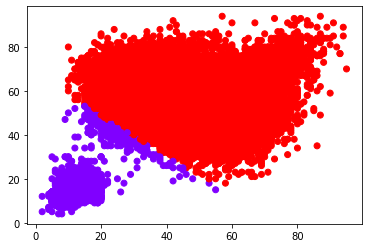

In [6]:
# code to create scatterplot with the classification
plt.scatter(cust_x['Finishing'], cust_x['HeadingAccuracy'], c=kmeans.labels_, cmap='rainbow')

**<span >\<describe the result, is it what you'd hoped for? Explain why this might be (think of how k-means works)></span>** <br>
## Not yet done
If you look at the picture, you would probably have expected that the group left below would have been 1 cluster with a few spots around it. But it seems that some of the red cluster also became purple. Not a nice split up for 2 expected clusters. <br>


Perhaps another initialization method works better. K-means++ is quite popular. 

**<span >\<explain briefly how k-means++ is different from k-means in your own words></span>**.<br>
K-means++, unlike k-means, searches for one centroid randomly and then start looking for other centroids. K-means just starts looking for multiple centroids randomly and afterwards it starts looking for 'better' solutions

Lets see:

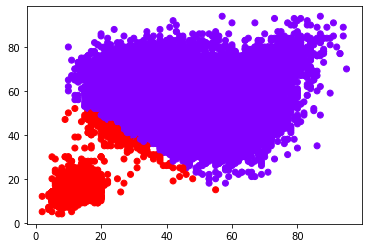

In [7]:
# code to create and fit the k-means++ (elkan) and also show the scatterplot
kmeans_plus = KMeans(init='k-means++', algorithm='elkan', n_clusters=2, random_state=0)
kmeans_plus.fit(cust_x)
plt.scatter(cust_x['Finishing'], cust_x['HeadingAccuracy'], c=kmeans_plus.labels_, cmap='rainbow')


**<span >\<describe the result, is it what you'd hoped for?></span>**<br>
As you can see, we get a similar result as with the normal k-means. Not what we wanted.

Perhaps the k=2 is wrong. We could try to iterate over different values of k and measure the performance with a few different metrics.

We'll use the same function as in the Jupyter Notebook from the lecture:

In [8]:
# copy the elbowPlot function, and if you like you can adjust it.

from yellowbrick.cluster import KElbowVisualizer

def elbowPlot(data, model, kRange):

    # set the plotting stage for later
    fig, (ax1, ax2, ax3) = plt.subplots(
        1, 3, constrained_layout=True, figsize=(15, 5))

    # Using the Distortion measure:
    visualizer = KElbowVisualizer(model, k=kRange, metric='distortion', ax=ax1)
    chPlot = visualizer.fit(data)
    ax1.set_title('Distortion')

    # Using the Calinski-Harabasz measure
    visualizer = KElbowVisualizer(
        model, k=kRange, metric='calinski_harabasz', ax=ax2)
    chPlot = visualizer.fit(data)
    ax2.set_title('Calinski-Harabasz')

    # Using the Silhouette measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='silhouette', ax=ax3)
    chPlot = visualizer.fit(data)
    ax3.set_title('Silhouette')

    # Show the results
    plt.show()


Now lets see what this gives for our Soccer data:

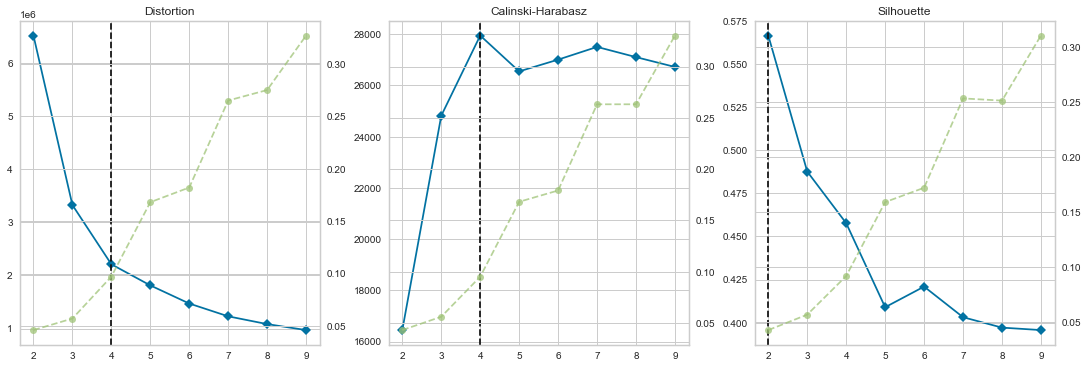

In [9]:
# code to show the three elbow plots (this might take a little time)
elbowPlot(cust_x, kmeans_plus, (2,10))

**<span >\<Explain the results: which k is recommended AND what does 'Distortion', 'Calinski-Harabasz', and 'Silhouette' actually measure (briefly explain the difference in your own words></span>** <br>
Well we got it wrong with k=2. It seems that k=4 is recommended. <br>

You are also probably wondering what 'Distortion', 'Calinski-Harabasz', and 'Silhouette' means. Well.....

Lets see what happens if we use the recommended k value:

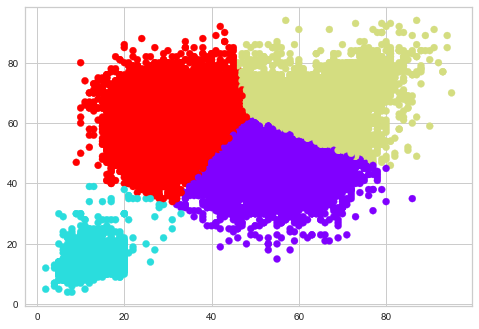

In [10]:
# code to create and fit the k-means++ (full) and also show the scatterplot with the k value from the elbow plot
# code to create and fit the k-means++ (elkan) and also show the scatterplot
kmeans_plus = KMeans(init='k-means++', algorithm='elkan', n_clusters=4, random_state=0)
kmeans_plus.fit(cust_x)
plt.scatter(cust_x['Finishing'], cust_x['HeadingAccuracy'], c=kmeans_plus.labels_, cmap='rainbow')


**<span >\<describe the result, is it what you'd hoped for?></span>** <br>
With k=4, the result is indeed much better. Now we have a clear view on the all the clusters. Also notice that the bottom left now had a more reasonable cluster than it had before.

Now lets see if another technique might do better (or worse).

## 1.2. Hierarchical Clustering Analysis (HCA)

The second technique discussed was the Hierarchical Clustering Analysis (HCA). 

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.

One selection to be made is the so-called 'linkage'. The four basic ones are 'single', 'complete', 'mean', and 'ward'.

**<span style='background:yellow'>\<give a brief description of each of these linkage options></span>**

In the Jupyter Notebook from the lecture there was a function that can compare these four options in one go. Lets use that here as well.

In [11]:
# copy the compareLinkage function, and if you like you can adjust it.
from sklearn.cluster import AgglomerativeClustering
def compareLinkage(my_data, k):
    hca, axs = plt.subplots(2, 2, constrained_layout=True)

    hier_clust = AgglomerativeClustering(linkage='single', n_clusters=k)
    hier_clust.fit(my_data)
    axs[0, 0].scatter(my_data[:, 0], my_data[:, 1],
                      c=hier_clust.labels_, cmap='rainbow')
    axs[0, 0].set_title('Single')

    hier_clust = AgglomerativeClustering(linkage='average', n_clusters=k)
    hier_clust.fit(my_data)
    axs[0, 1].scatter(my_data[:, 0], my_data[:, 1],
                      c=hier_clust.labels_, cmap='rainbow')
    axs[0, 1].set_title('Average')

    hier_clust = AgglomerativeClustering(linkage='complete', n_clusters=k)
    hier_clust.fit(my_data)
    axs[1, 0].scatter(my_data[:, 0], my_data[:, 1],
                      c=hier_clust.labels_, cmap='rainbow')
    axs[1, 0].set_title('Complete')

    hier_clust = AgglomerativeClustering(linkage='ward', n_clusters=k)
    hier_clust.fit(my_data)
    axs[1, 1].scatter(my_data[:, 0], my_data[:, 1],
                      c=hier_clust.labels_, cmap='rainbow')
    axs[1, 1].set_title('Ward')

    plt.show()


Now lets use it on the Soccer data. We assumed there to be 2 clusters, so we'll stick with our k = 2 for now.

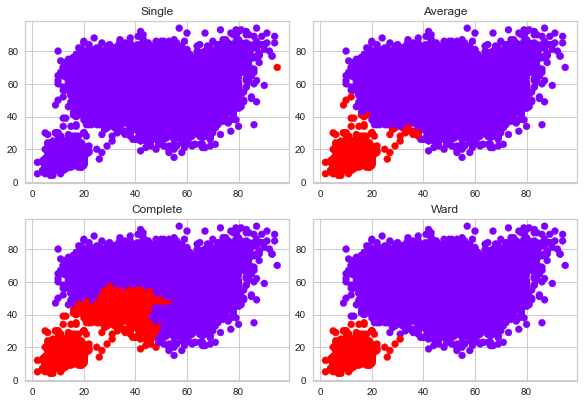

In [12]:
# code to create the four HCA linkage models and scatterplot (use the function)
cust_x_arr = np.array(cust_x)
compareLinkage(cust_x_arr, 2)

**<span style='background:yellow'>\<what do you notice? Are they all the same? What might cause the differences?></span>**

Would the k = 2 perhaps again be different? Lets find out. We can use our 'elbowPlot' function here as well.

Single


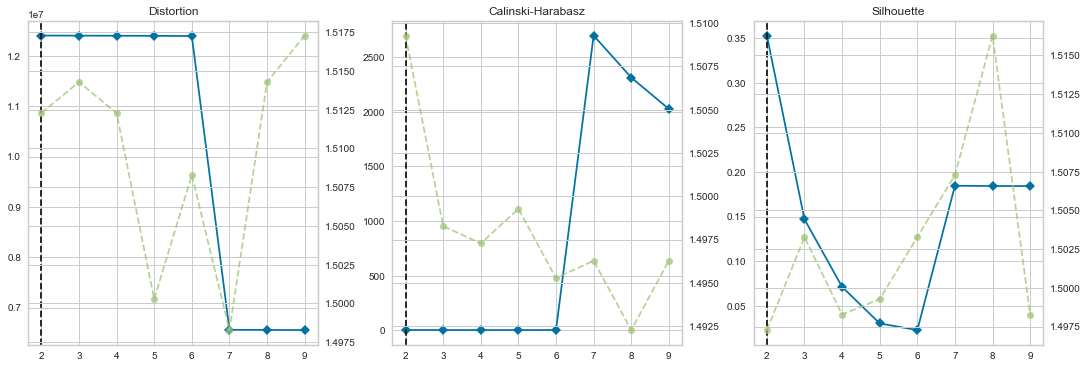


Average


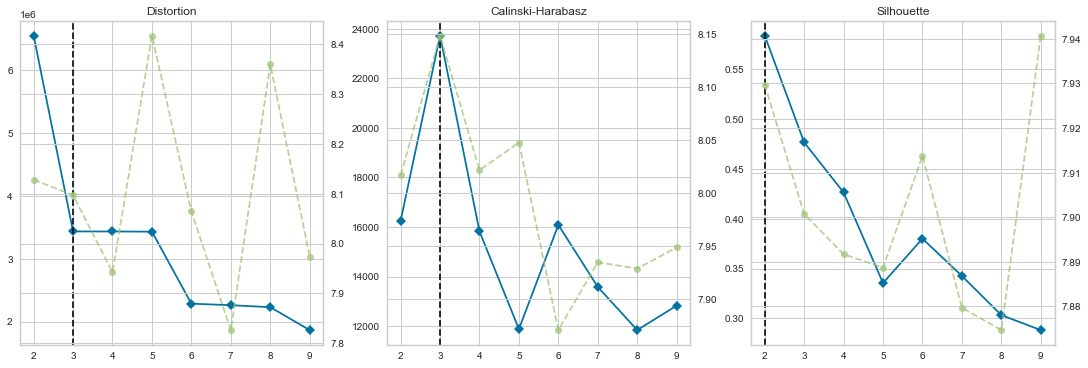


Complete


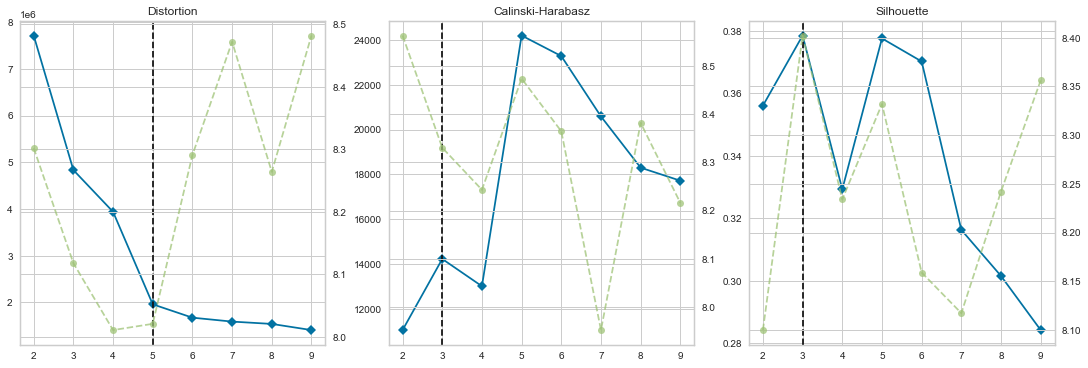


Ward


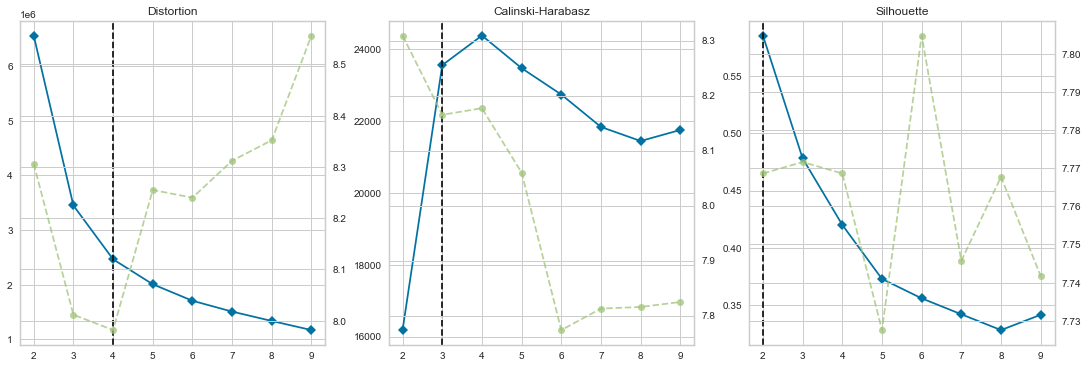

In [23]:
# code to run the elbowPlot four times (ones for each different linkage) (this might take quite some time)
# print something between so you know which output belongs to which linkage
print('Single')
hier_clust_single = AgglomerativeClustering(linkage='single', n_clusters=2)
elbowPlot(cust_x_arr, hier_clust_single, (2,10))

print()

print('Average')
hier_clust_average = AgglomerativeClustering(linkage='average', n_clusters=2)
elbowPlot(cust_x_arr, hier_clust_average, (2, 10))

print()

print('Complete')
hier_clust_complete = AgglomerativeClustering(linkage='complete', n_clusters=2)
elbowPlot(cust_x_arr, hier_clust_complete, (2, 10))

print()

print('Ward')
hier_clust_ward = AgglomerativeClustering(linkage='ward', n_clusters=2)
elbowPlot(cust_x_arr, hier_clust_ward, (2,10))

**<span style='background:yellow'>\<are there any other suggestions for k than 2? What seems to be the most common suggestion (the modal suggestion)?></span>**

A few different k-s are suggested by the elbow plot. Lets see how our HCA performs if we use those.

Single


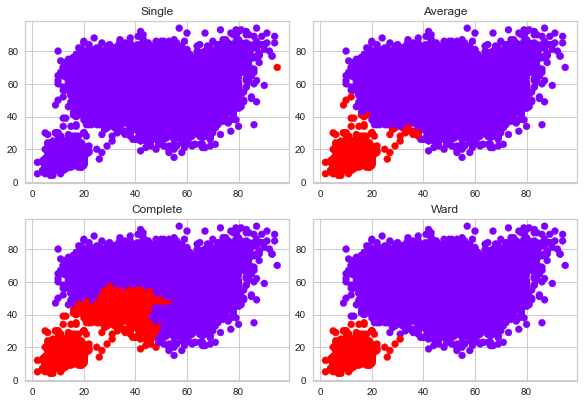


Average


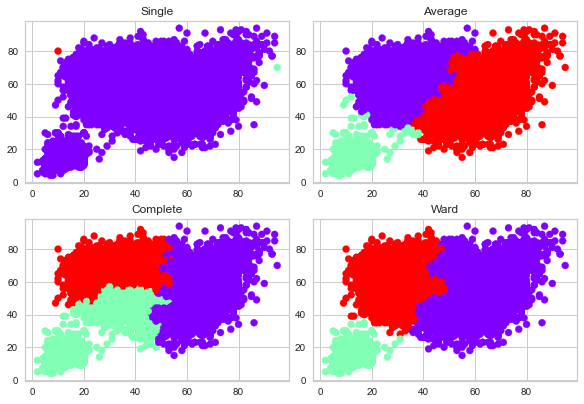


Complete


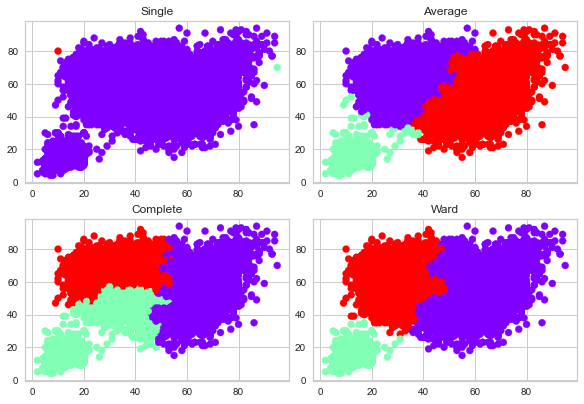


Ward


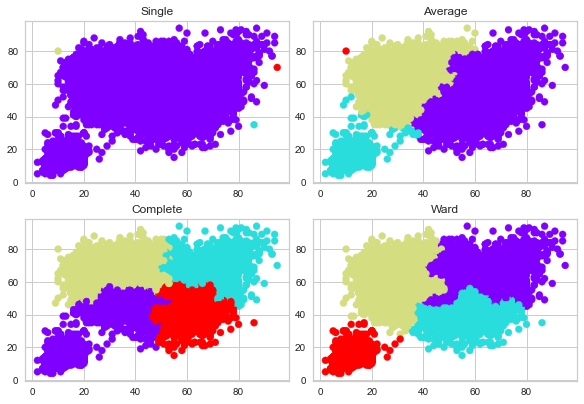

In [24]:
# code to show the four linkages for the different suggested k's from the elbow plots. 2 3 
print('Single')
compareLinkage(cust_x_arr, 2)
print()

print('Average')
compareLinkage(cust_x_arr, 3)
print()

print('Complete')
compareLinkage(cust_x_arr, 3)
print()

print('Ward')
compareLinkage(cust_x_arr, 4)

**<span style='background:yellow'>\<what can be concluded from the result? how did HCA compare to our k-means></span>**

The dendrogram is also often used. Lets at least produce it once.

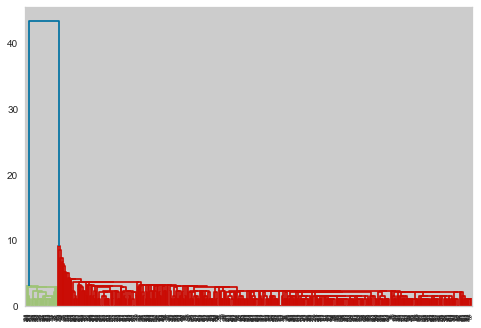

In [11]:
# code to show at least one dendrogram. (if your kernel crashes on this, show a dendrogram of a selected portion of the data)
from scipy.cluster.hierarchy import dendrogram, linkage
cust_x_ss = cust_x[0:500]
Z = linkage(cust_x_ss, method='single')
dendrogram(Z)
plt.show()

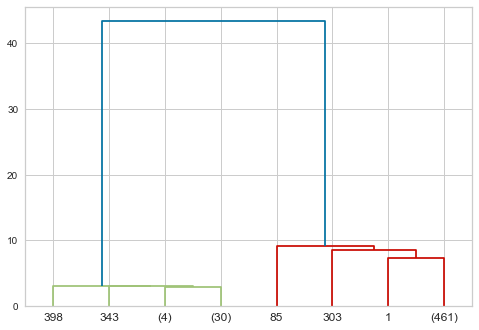

In [12]:
# if dendrogram is too large, code to zoom in.
dendrogram(Z, p=3, truncate_mode='level')
plt.show()

Allright, two techniques down, lets move on to the third...

## 1.3. DBSCAN

The third technique discussed was the Density Based Spatial Clustering of Applications with Noise (DBSCAN).

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.

This method will require two input parameters. The epsilon and the min number of samples.

As the min number of samples I have chosen for **<span style='background:yellow'>\<enter your value here></span>**.

For the epsilon we can create a visual aid using the nearest neighbors.

In [ ]:
# code to show the nearest neighbors plot with different distances


**<span style='background:yellow'>\<interpret the result, what would be a good epsilon?></span>**

Now that we have a min number of points for a neighborhood, and an epsilon we can run the DBSCAN.

In [ ]:
# code to create and fit the DBSCAN model.


Lets look at the results:

In [ ]:
# code to show the scatterplot with the clusters


**<span style='background:yellow'>\<describe the result, how does it compare to the other models, what might cause this></span>**

There was one more technique discussed, the almost perfect HDBSCAN...

## 1.4. HDBSCAN

The fourth technique was the Hierachical Density Based Spatial Clustering of Applications with Noise (HDBSCAN).

**<span style='background:yellow'>\<explain how this technique is different from DBSCAN in your own words></span>**.

One big advantage of this technique is that it only requires one input parameter: the min samples. We can use the same as from DBSCAN. So lets dive right in.

In [ ]:
# code to create and fit the HDBSCAN model.


And the result....

In [ ]:
# code to show the scatterplot with the clusters


**<span style='background:yellow'>\<describe the result, how does it compare to the other models></span>**

The HDBSCAN actually goes through a few steps: The minimum spanning tree => the dendrogram => the condensed tree.

In the Jupyter Notebook from the lecture, a small function was made to show these. 

In [ ]:
# code of the HDBSCANvisuals function, adjust if needed/wanted/improvements.


So for those who like to see what is going on in these stages:

In [ ]:
# code using the function to show the three visuals. Note if your kernel crashes with this, you can use a sample set from the data.


## 1.5. Adjusting the Data

We used the unadjusted data, but often a normalization is used. What would the results have been, if we had first normalized our scores using the StandardScaler.

Lets find out.

First transform the data:

In [ ]:
# code using the StandardScaler to transform the data.


Now lets see all the results again, but using this scaled data.

In [ ]:
# long code cell with all the different models using the scaled data. Output should each time be the scatterplot.
# you could add some other cells first to find perhaps some parameters.


**<span style='background:yellow'>\<how do the results compare when using the unadjusted data?></span>**

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template for those chapters is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 2. Improved Visualisation

The basic scatterplot can become a big blur, especially when you have a lot of datapoints.

*note: you can also use the clusterable_data.npy or another dataset, but it has to be one with a LOT of datapoints*

In [ ]:
# code to load dataset if not already loaded


If we create a scatterplot of **<span style='background:yellow'>\<your first choosen variable></span>** and **<span style='background:yellow'>\<your second choosen variable></span>**

In [ ]:
# code to create the basic scatterplot


It looks like a big blur.

One technique to overcome this, is to use opacity. See for an example: https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/04/Scatter_Plot_transparent_with_log_scale_Seaborn_Python.jpeg

Here's a function that can create the scatterplot like this, for a given model and dataset.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot with the opacity. The level of opacity can also be a parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the scatterplot with opacity.


Another method to deal with even larger datasets is a heatmap. An example is shown below.

![image heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvQZGu7SMVBCh6KIcF7toUqRpak2qWwQNkkhpZzv30hFbwYdDk&usqp=CAU)

This usually requires a Gaussian kernel, and is often slower than the previous methods.

So lets create a function for this as well.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot as a heatmap. The color scaling could be an optional parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the heatmap.


# 3. A New Technique

In the Jupyter Notebook from the lecture, we discussed quite a few techniques:

* k-means (with Lloyd and Elkan)
* k-means++ (with Lloyd and Elkan)
* HCA Single linkage
* HCA Complete linkage
* HCA Mean linkage
* HCA Ward linkage
* DBSCAN
* HDBSCAN*

In the appendix there was also:

* Affinity Propagation
* Spectral Clustering
* Mini-batch K-means
* k-medoids
* HCA Centroid linkage
* HCA Median linkage
* Mean Shift
* OPTICS

However, as shown on the slides (near the end) there are a lot more. 

In this chapter the **<span style='background:yellow'>\<your chosen technique that is not listed above></span>** is discussed.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? How is it compared to the other techniques discussed? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)


In [ ]:
# code to show the result


# 4. Categorical Data

As with the clustering, the categorical data is a special case. In this chapter we'll describe one way to cluster using categorical data.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)


In [ ]:
# code to show the result in a scatterplot with the clusters.


# 5. Elbow as a Number
The elbowPlot gives a nice visual tool. But I'd like to have the resulting k-value as a number, so I can use it as an input parameter for some loops over different models.

I couldn't find a method to extract the result from the KElbowVisualizer. So we'll have to create something ourselves. Perhaps 'from kneed import KneeLocator' can help here...

Below is a function that will find the knee/elbow point for each of the three metrics, and returns the results as an array.

In [ ]:
# code for the above described function


In [ ]:
# code as example to use the function
